
# <p style="background-color:#A291A7;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:20px 30px;"> Titanic using PyCaret</p>

So you have a Kaggle account,what next?

What if I tell you you can create your very first submission in less than 100 lines of code? Perhaps you're looking to become a contributor from a Novice.

No,I'm not talking the usual Logistic regression. I'm talking advanced Kaggle concepts like Feature engineering,Blending,Stackimg and Ensembling?

Welcome Pycaret,a low Code library developed by Moez Ali,which helps professional data scientists develop prototypes quickly with very few lines of code.

It provides a great starting point to rule out what works for your data and what doesn't,so I highly recommend this.
In this code, We will read the data and create models and final predictions.
I do recommend reading the official documentation while following along,and typing your own code by reading this notebook.

*If you find this useful, Consider upvoting .If you have any feedbacks, please leave it in the comments.*

* [1. Data Dictionary](#1)
    
* [2. Feature Engineering](#2)
    
* [3. Setting up Pycaret](#3)  
    
* [4. Model comparison](#4)  
    
* [5. Model selection](#5) 

* [6. Model tuning](#6) 

* [7. Model ensembling](#7) 

* [8. References](#9) 

# <a id="1"></a>
# <p style="background-color:#A291A7;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:20px 30px;"> Data Dictionary</p>

* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
import pandas as pd 

In [2]:
# #Pycaret needs to be installed
!pip install pycaret

     |████████████████████████████████| 266 kB 289 kB/s 
     |████████████████████████████████| 167 kB 3.5 MB/s 
     |████████████████████████████████| 111 kB 3.8 MB/s 
     |████████████████████████████████| 25.9 MB 1.8 MB/s 
     |████████████████████████████████| 14.6 MB 66.4 MB/s 
     |████████████████████████████████| 24.2 MB 843 kB/s 
     |████████████████████████████████| 1.1 MB 63.3 MB/s 
     |████████████████████████████████| 79 kB 5.9 MB/s 
     |████████████████████████████████| 56 kB 2.8 MB/s 
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158172 sha256=9592bae76d258baef093e2af1c4c4847796cb5fd9d5df3029148887e6adb31fb
  Stored in directory: /root/.cache/pip/wheels/be/5d/0a/9e13f53f4f5dfb67cd8d245bb7cdffe12f135846f491a283e3
  Created wheel for databricks-cli: filename=databricks_cli-0.15.0-py3-none-any.whl size=105260 sha256=72dc5a802e75aec21b6adae3a214072b22b9e9cfc61ea9fc45ff19496e92bfb8
  Stored in directory: /root/.cache/pip/wheels/e7/ba

In [3]:
#Let's read the data
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

# <a id="2"></a>
# <p style="background-color:#A291A7;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:20px 30px;">Feature Engineering</p>

**Feature engineering using these rules,and a few mentioned in the notebook in the reference:**

Predict live for all males titled “Master” whose entire family, excluding adult males, all live.
Predict die for all females whose entire family, excluding adult males, all die.

In [4]:
train['title']=train.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
test['title']=test.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())

In [5]:
newtitles={
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"}

In [6]:
train['title']=train.title.map(newtitles)
test['title']=test.title.map(newtitles)

In [7]:
train['Relatives']=train.SibSp+train.Parch
test['Relatives']=test.SibSp+test.Parch

train['Ticket2']=train.Ticket.apply(lambda x : len(x))
test['Ticket2']=test.Ticket.apply(lambda x : len(x))

In [8]:
train['Cabin2']=train.Cabin.apply(lambda x : len(str(x)))
test['Cabin2']=test.Cabin.apply(lambda x : len(str(x)))

In [9]:
train['Name2']=train.Name.apply(lambda x: x.split(',')[0].strip())
test['Name2']=test.Name.apply(lambda x: x.split(',')[0].strip())

# <a id="3"></a>
# <p style="background-color:#A291A7;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:20px 30px;"> Setting up Pycaret</p>


This is where magic happens.One line does all of these things:

* I will tell the model to ignore certain ID features with high cardinality,the target column,and give my session an id.
* I will also pass sex as a categorical feature here,and try rebalancing to see how it turns out.
* I will pass multicollinearity handling as true so that it takes care of it.
* I will normalize the data



In [10]:
from pycaret import classification
classification_setup = classification.setup(data = train,target = 'Survived',silent=True,)

,Description,Value
0,session_id,2605
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 17)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


# <a id="4"></a>
# <p style="background-color:#A291A7;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:20px 30px;">Model Comparison</p>

In [11]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8332,0.8149,0.7444,0.7952,0.7651,0.6367,0.6406,0.0330
ridge,Ridge Classifier,0.8314,0.0000,0.7446,0.7909,0.7644,0.6338,0.6367,0.0300
rf,Random Forest Classifier,0.8266,0.8774,0.7101,0.8034,0.7490,0.6182,0.6248,0.3790
catboost,CatBoost Classifier,0.8251,0.8820,0.6538,0.8425,0.7302,0.6054,0.6199,2.5730
lr,Logistic Regression,0.8250,0.8833,0.7317,0.7838,0.7545,0.6192,0.6221,0.5890
xgboost,Extreme Gradient Boosting,0.8250,0.8739,0.7402,0.7795,0.7559,0.6203,0.6236,16.4880
gbc,Gradient Boosting Classifier,0.8219,0.8704,0.6752,0.8132,0.7341,0.6028,0.6113,0.2620
lightgbm,Light Gradient Boosting Machine,0.8217,0.8718,0.7272,0.7799,0.7490,0.6116,0.6154,0.1490
ada,Ada Boost Classifier,0.8154,0.8662,0.7188,0.7685,0.7411,0.5983,0.6005,0.1290
et,Extra Trees Classifier,0.8154,0.8636,0.7230,0.7697,0.7422,0.5991,0.6028,0.3570


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2605, splitter='best')

# <a id="5"></a>
# <p style="background-color:#A291A7;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:20px 30px;">Model Selection</p>

In [12]:
lgb_classifier = classification.create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8730,0.8891,0.7391,0.8947,0.8095,0.7156,0.7229
1,0.8571,0.9022,0.7826,0.8182,0.8000,0.6890,0.6894
2,0.8413,0.8600,0.7500,0.8182,0.7826,0.6580,0.6595
3,0.8387,0.9186,0.8261,0.7600,0.7917,0.6605,0.6620
4,0.8065,0.9041,0.7826,0.7200,0.7500,0.5926,0.5939
5,0.7419,0.7592,0.4783,0.7333,0.5789,0.4046,0.4238
6,0.8065,0.8495,0.6957,0.7619,0.7273,0.5778,0.5792
7,0.8226,0.8662,0.6957,0.8000,0.7442,0.6094,0.6129
8,0.8065,0.8930,0.7826,0.7200,0.7500,0.5926,0.5939
9,0.8226,0.8763,0.7391,0.7727,0.7556,0.6164,0.6168


In [13]:
import numpy as np
params = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],
          'n_estimators':[100,250,500,750,1000,1250,1500,1750],
          'max_depth': np.random.randint(1, (len(train.columns)*.85),20),
          'max_features': np.random.randint(1, len(train.columns),20),
          'min_samples_split':[2,4,6,8,10,20,40,60,100], 
          'min_samples_leaf':[1,3,5,7,9],
          'criterion': ["gini", "entropy"]}

tune_lgb = classification.tune_model(lgb_classifier, custom_grid = params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.8891,0.7826,0.9000,0.8372,0.7535,0.7577
1,0.8254,0.9011,0.7391,0.7727,0.7556,0.6199,0.6202
2,0.8571,0.8622,0.7500,0.8571,0.8000,0.6897,0.6934
3,0.8387,0.9175,0.8261,0.7600,0.7917,0.6605,0.6620
4,0.8226,0.9019,0.7826,0.7500,0.7660,0.6232,0.6236
5,0.7581,0.7603,0.4783,0.7857,0.5946,0.4364,0.4637
6,0.7903,0.8595,0.6957,0.7273,0.7111,0.5467,0.5470
7,0.8226,0.8618,0.6957,0.8000,0.7442,0.6094,0.6129
8,0.8226,0.8974,0.7826,0.7500,0.7660,0.6232,0.6236
9,0.8226,0.8785,0.6957,0.8000,0.7442,0.6094,0.6129


# <a id="6"></a>
# <p style="background-color:#A291A7;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:20px 30px;"> Model Tuning</p>

In [14]:
# Tune the model
params = {'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
tune_ridge = classification.tune_model(classification.create_model('ridge'), custom_grid = params, n_iter=50, fold=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9231,0.0000,0.8000,1.0000,0.8889,0.8312,0.8433
1,0.7692,0.0000,0.6000,0.7500,0.6667,0.4935,0.5007
2,0.7692,0.0000,0.8000,0.6667,0.7273,0.5301,0.5367
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9231,0.0000,0.8000,1.0000,0.8889,0.8312,0.8433
6,0.7692,0.0000,0.8000,0.6667,0.7273,0.5301,0.5367
7,0.8462,0.0000,1.0000,0.7143,0.8333,0.6977,0.7319
8,0.6923,0.0000,0.4000,0.6667,0.5000,0.2973,0.3175
9,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# <a id="7"></a>
# <p style="background-color:#A291A7;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:20px 30px;"> Model ensembling</p>

In [15]:
# ensemble boosting
bagging = classification.ensemble_model(tune_lgb, method= 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.8902,0.6522,0.9375,0.7692,0.6705,0.6937
1,0.8571,0.9163,0.7826,0.8182,0.8000,0.6890,0.6894
2,0.8413,0.8600,0.7083,0.8500,0.7727,0.6523,0.6587
3,0.8548,0.9186,0.8261,0.7917,0.8085,0.6917,0.6921
4,0.8065,0.9298,0.7826,0.7200,0.7500,0.5926,0.5939
5,0.7581,0.8183,0.4783,0.7857,0.5946,0.4364,0.4637
6,0.8226,0.8640,0.7391,0.7727,0.7556,0.6164,0.6168
7,0.8710,0.8495,0.7391,0.8947,0.8095,0.7133,0.7207
8,0.8387,0.8896,0.7391,0.8095,0.7727,0.6481,0.6497
9,0.8226,0.8874,0.6957,0.8000,0.7442,0.6094,0.6129


In [16]:
from pycaret.classification import blend_models
# blending all models
blend_all = blend_models(method='hard',estimator_list=classification.compare_models(sort='Accuracy',n_select=10))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8254,0.0000,0.6087,0.8750,0.7179,0.5973,0.6180
1,0.8413,0.0000,0.7391,0.8095,0.7727,0.6512,0.6528
2,0.8095,0.0000,0.6250,0.8333,0.7143,0.5758,0.5892
3,0.9194,0.0000,0.8261,0.9500,0.8837,0.8225,0.8272
4,0.8387,0.0000,0.7826,0.7826,0.7826,0.6544,0.6544
5,0.7581,0.0000,0.5217,0.7500,0.6154,0.4471,0.4628
6,0.8226,0.0000,0.6957,0.8000,0.7442,0.6094,0.6129
7,0.8871,0.0000,0.6957,1.0000,0.8205,0.7420,0.7680
8,0.7903,0.0000,0.7391,0.7083,0.7234,0.5547,0.5550
9,0.8226,0.0000,0.6087,0.8750,0.7179,0.5945,0.6154


In [17]:
# create individual models for stacking
ridge_cls = classification.create_model('ridge')
extre_tr = classification.create_model('et')
lgb = classification.create_model('lightgbm')
cat_cls = classification.create_model('catboost')
lg_cls = classification.create_model('lr')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8254,0.9087,0.6957,0.8000,0.7442,0.6126,0.6161
1,0.8571,0.9207,0.8261,0.7917,0.8085,0.6947,0.6951
2,0.8095,0.8857,0.7083,0.7727,0.7391,0.5896,0.5910
3,0.9032,0.9677,0.8696,0.8696,0.8696,0.7926,0.7926
4,0.8226,0.9208,0.7391,0.7727,0.7556,0.6164,0.6168
5,0.7419,0.7336,0.5217,0.7059,0.6000,0.4158,0.4261
6,0.7903,0.8372,0.7391,0.7083,0.7234,0.5547,0.5550
7,0.9032,0.9353,0.7826,0.9474,0.8571,0.7850,0.7932
8,0.8065,0.8517,0.7826,0.7200,0.7500,0.5926,0.5939
9,0.7903,0.8718,0.6522,0.7500,0.6977,0.5384,0.5415


In [18]:
from pycaret.classification import stack_models
# stacking models
stacker = stack_models(estimator_list = [ridge_cls, extre_tr, lgb, cat_cls, lg_cls])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8413,0.9359,0.6522,0.8824,0.7500,0.6375,0.6531
1,0.8730,0.9261,0.7826,0.8571,0.8182,0.7209,0.7227
2,0.8413,0.8996,0.7500,0.8182,0.7826,0.6580,0.6595
3,0.8871,0.9565,0.8696,0.8333,0.8511,0.7602,0.7607
4,0.8387,0.9331,0.8261,0.7600,0.7917,0.6605,0.6620
5,0.7419,0.7480,0.5217,0.7059,0.6000,0.4158,0.4261
6,0.8065,0.8651,0.7391,0.7391,0.7391,0.5853,0.5853
7,0.8710,0.9220,0.7391,0.8947,0.8095,0.7133,0.7207
8,0.7903,0.8863,0.7826,0.6923,0.7347,0.5624,0.5653
9,0.7903,0.8785,0.6522,0.7500,0.6977,0.5384,0.5415


This function returns the best model out of all models created in the current active environment based on metric defined in optimize parameter. Run this code at the end of  your script.
Let's see the best model up until now.

In [19]:
best = classification.automl(optimize = 'auc')


In [20]:
best
# A stacked classifier it is!!

StackingClassifier(cv=StratifiedKFold(n_splits=10,
        random_state=RandomState(MT19937) at 0x7F069D59A6B0, shuffle=False),
                   estimators=[('ridge',
                                RidgeClassifier(alpha=1.0, class_weight=None,
                                                copy_X=True, fit_intercept=True,
                                                max_iter=None, normalize=False,
                                                random_state=2605,
                                                solver='auto', tol=0.001)),
                               ('et',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_we...
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False

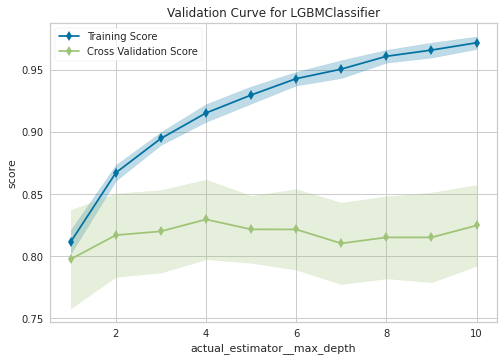

In [21]:
# Validation Curve
classification.plot_model(tune_lgb, plot = 'vc')

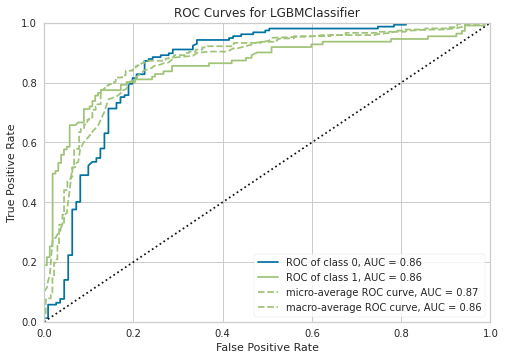

In [22]:
# AUC Curve
classification.plot_model(tune_lgb, plot = 'auc')

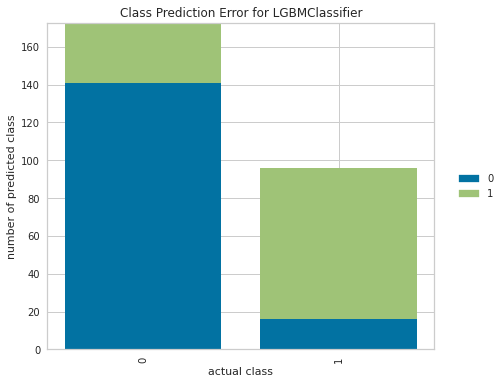

In [23]:
# error Curve
classification.plot_model(tune_lgb, plot = 'error')

In [24]:
y_pred = classification.predict_model(tune_lgb, data=test)

In [25]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred['Label']
    })
submission.to_csv("submission.csv", index=False)

Happy Kaggling :)

# <a id="9"></a>
# <p style="background-color:#A291A7;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:20px 30px;"> References</p>
* https://www.kaggle.com/aditi81k/titanic-prediction-using-pycaret
(Thanks Aditi)
* https://pycaret.org/
(Official Documentation)
* https://www.kaggle.com/goldens/titanic-on-the-top-with-a-simple-model
(Feature engineering)